In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('mushrooms.csv')
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [5]:
df.shape

(8124, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


<AxesSubplot:>

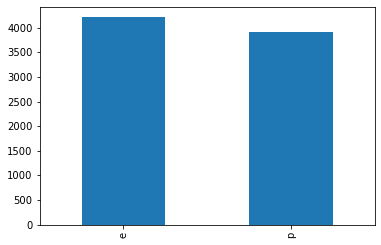

In [11]:
df['class'].value_counts().plot(kind='bar')

# DATA PREPROCESSING

In [12]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [16]:
x=df.drop(['class'],axis=1)
y=pd.DataFrame(df['class'])

#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder

x = x.apply(LabelEncoder().fit_transform)
y = y.apply(LabelEncoder().fit_transform)

# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Model Application

1.logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('recall is:',recall_score(y_test,y_pred,))
print('f1 is:',f1_score(y_test,y_pred))

Accuracy is: 0.9527326440177253
Precision is: 0.9479479479479479
recall is: 0.9556004036326943
f1 is: 0.9517587939698493


In [18]:
confusion_matrix(y_test,y_pred)

array([[988,  52],
       [ 44, 947]], dtype=int64)

2.Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('recall is:',recall_score(y_test,y_pred))
print('f1 score is:',f1_score(y_test,y_pred))

Accuracy is: 1.0
Precision is: 1.0
recall is: 1.0
f1 score is: 1.0


In [20]:
confusion_matrix(y_test,y_pred)

array([[1040,    0],
       [   0,  991]], dtype=int64)

# Naïve Bayes’ Classifier

In [21]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('recall is:',recall_score(y_test,y_pred))
print('f1 score is:',f1_score(y_test,y_pred))

Accuracy is: 0.9256523879862137
Precision is: 0.9183266932270916
recall is: 0.9303733602421796
f1 score is: 0.9243107769423559


In [22]:
confusion_matrix(y_test,y_pred)

array([[958,  82],
       [ 69, 922]], dtype=int64)

Conclusion

In [ ]:
753 mushrooms are edible and 60 mushrooms are poisonous.